<a href="https://colab.research.google.com/github/Dushmanthr/Sinhala_AI_Generated_Answer_Detection/blob/main/My_research_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sinling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.2 MB/s eta 0:00:00


In [3]:
!pip install advertools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.3/252.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 5.1 MB/s eta 0:00:00


In [4]:
!pip install translate

In [5]:
!pip install pyenchant

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.4 MB/s eta 0:00:00


In [6]:
from sinling import SinhalaTokenizer as tokenizer,SinhalaStemmer as stemmer, POSTagger,preprocess, word_joiner,word_splitter
from nltk.tokenize import sent_tokenize,word_tokenize,TweetTokenizer
from nltk.probability import FreqDist
import advertools as adv
from pathlib import Path
import string

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn import linear_model

import codecs
import nltk
nltk.download('punkt')
import re

from nltk.corpus import stopwords
from collections import Counter

from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from nltk.tokenize.treebank import TreebankWordDetokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Processed.xlsx to Processed.xlsx


0                            රාවණා 1
1                     ලෝන්ලි ප්ලැනට්
2                             වූහාන්
3                              25200
4     ආසියා රග්බී පළමු කාණ්ඩ ශූරතාවය
5                            වලයාකාර
6             නෝත්රා දාම් දෙව්මැදුර 
7                             ලන්ඩන්
8                               චීනය
9                     උණ කුලයේ ශාඛයි
10                   මැක්සිම් ගෝර්කි
Name: Answers, dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:2641: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


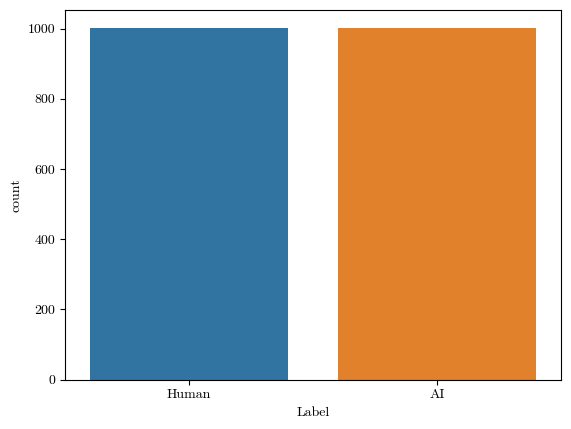

In [12]:
# %% read csv file data
import matplotlib.pyplot as plt
import seaborn as sns

file = pd.read_excel('Processed.xlsx')
#pd.read_csv(Path().joinpath('data','traindata2.csv'))
print(file['Answers'].head(11))
plt.rcParams['font.sans-serif']= "cmr10"
sns.countplot(x='Label',hue='Label',data=file)
plt.show()

In [13]:
df = pd.read_excel('Processed.xlxs', error_bad_lines=False)

print(df['Answers'])

TypeError: read_excel() got an unexpected keyword argument 'error_bad_lines'